In [99]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import itertools

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')
df_x_y = df.iloc[:,4:19]
tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(classes)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])


[sad, classical, country, party, happy, ..., oldhits, rock, trance, workout, edm]
Length: 14
Categories (14, object): [sad, classical, country, party, ..., rock, trance, workout, edm]
['sad', 'classical', 'country', 'party', 'happy', 'hiphop', 'jazz', 'romantic', 'newhits', 'oldhits', 'rock', 'trance', 'workout', 'edm']


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    from matplotlib.pyplot import figure
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()


# Decision Tree

In [97]:
def decision_tree_model(x_train, y_train, x_val, y_val):
    clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_val)
    print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred), y_pred

final valdation accuracy:  0.35256124721603566
             precision    recall  f1-score   support

          0       0.48      0.44      0.46       320
          1       0.34      0.35      0.34       315
          2       0.40      0.47      0.43       327
          3       0.01      0.01      0.01       187
          4       0.43      0.52      0.47       349
          5       0.58      0.66      0.62       408
          6       0.12      0.14      0.13       212
          7       0.18      0.24      0.20       272
          8       0.17      0.19      0.18       376
          9       0.25      0.06      0.10       249
         10       0.30      0.39      0.34       579
         11       0.22      0.22      0.22       442
         12       0.93      0.75      0.83       286
         13       0.44      0.07      0.11       168

avg / total       0.35      0.35      0.34      4490

final valdation accuracy:  0.3538975501113586
             precision    recall  f1-score   support

  

Normalized confusion matrix
[[0.48113 0.03145 0.02201 0.00314 0.02516 0.08491 0.00943 0.03459 0.06918
  0.02516 0.13522 0.06918 0.      0.00943]
 [0.02357 0.51515 0.00337 0.0101  0.03367 0.      0.01684 0.07744 0.0404
  0.08754 0.16162 0.02357 0.      0.00673]
 [0.00545 0.08174 0.45777 0.0327  0.02452 0.06267 0.0327  0.08447 0.01907
  0.10082 0.02452 0.04632 0.01635 0.0109 ]
 [0.01149 0.24713 0.12644 0.03448 0.07471 0.04023 0.01724 0.1092  0.0977
  0.08046 0.10345 0.02874 0.00575 0.02299]
 [0.0027  0.02426 0.02965 0.0027  0.57143 0.01348 0.04582 0.12129 0.06739
  0.02156 0.02426 0.06199 0.00539 0.00809]
 [0.07371 0.00737 0.0344  0.      0.01474 0.7027  0.      0.00246 0.04177
  0.00246 0.07617 0.04423 0.      0.     ]
 [0.00515 0.08247 0.05155 0.01031 0.15979 0.00515 0.13402 0.13402 0.09278
  0.08247 0.06186 0.1701  0.00515 0.00515]
 [0.00366 0.14286 0.11355 0.02198 0.12821 0.01832 0.04396 0.18681 0.06593
  0.14652 0.04762 0.04396 0.01465 0.02198]
 [0.04571 0.14    0.05714 0.00857 0.08

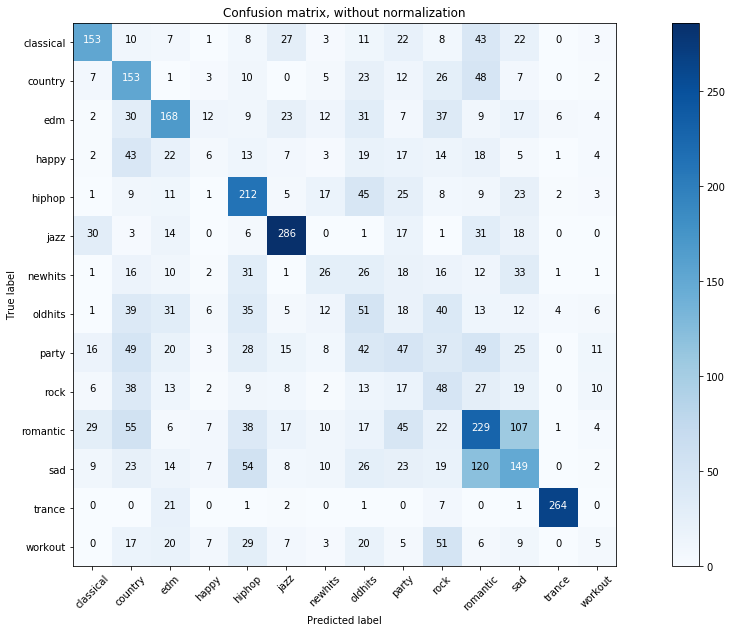

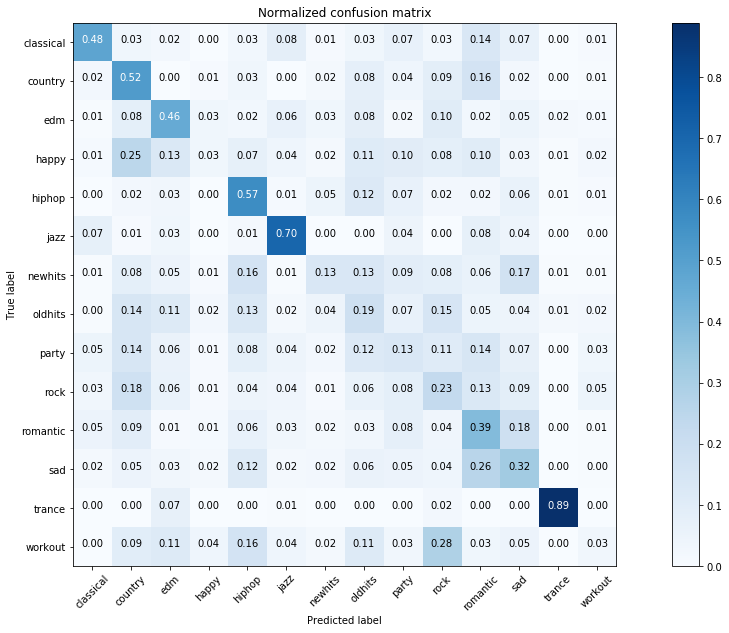

In [98]:
# In[ ]:

from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    values = decision_tree_model(X_train, y_train, X_test, y_train)
    accuracy_value = values[0]
    y_pred = values[1]
    accuracy.append(accuracy_value)
   
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    values = decision_tree_model(X_train, y_train, X_test, y_train)
    accuracy_value = values[0]
    y_pred = values[1]
    accuracy.append(accuracy_value)
    
    if(n == 4):
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, y_pred)
        

        # Plot non-normalized confusion matrix
        plt.figure(figsize=(20,10))
        print(class_names)
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title='Confusion matrix, without normalization')

        # Plot normalized confusion matrix
        plt.figure(figsize=(20,10))
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')

        plt.show()
# calculate average accuracy


# Random forrest

In [17]:
def random_forrest_model(x_train, y_train, x_val, y_val):
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    clf.fit(x_train, y_train)
    print("Feature importance: ")
    print(clf.feature_importances_)
    y_pred = clf.predict(x_val)
    print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)

In [30]:
# In[ ]:

from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(random_forrest_model(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(random_forrest_model(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

Feature importance: 
[0.07287023 0.09881421 0.09703852 0.05596149 0.07052725 0.08334147
 0.09806187 0.00486744 0.09081499 0.03972003 0.10928307 0.08413717
 0.07992113 0.01464113]
final valdation accuracy:  0.48329621380846327
             precision    recall  f1-score   support

          0       0.65      0.57      0.61       305
          1       0.41      0.56      0.47       310
          2       0.55      0.65      0.60       326
          3       0.03      0.01      0.01       176
          4       0.50      0.74      0.60       345
          5       0.77      0.82      0.79       400
          6       0.18      0.08      0.11       210
          7       0.29      0.31      0.30       283
          8       0.23      0.17      0.20       369
          9       0.28      0.13      0.17       229
         10       0.39      0.53      0.45       602
         11       0.39      0.39      0.39       436
         12       0.95      0.97      0.96       322
         13       0.32      0.1

Feature importance: 
[0.07749028 0.09455261 0.09874509 0.05697078 0.0778401  0.08255529
 0.09266325 0.0056377  0.08584122 0.03944274 0.10835364 0.082636
 0.08234433 0.01492696]
final valdation accuracy:  0.47928730512249446
             precision    recall  f1-score   support

          0       0.70      0.58      0.64       325
          1       0.42      0.60      0.49       321
          2       0.52      0.69      0.59       356
          3       0.16      0.02      0.04       172
          4       0.48      0.73      0.58       385
          5       0.76      0.71      0.74       389
          6       0.22      0.09      0.13       195
          7       0.26      0.27      0.26       273
          8       0.24      0.19      0.21       359
          9       0.33      0.17      0.22       253
         10       0.40      0.53      0.45       564
         11       0.38      0.40      0.39       431
         12       0.97      0.93      0.95       303
         13       0.19      0.07 

# Ada boost on Decision Tree

In [27]:
from sklearn.ensemble import AdaBoostClassifier
def AdaBoostModel(x_train, y_train, x_val, y_val):
    tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    clf = AdaBoostClassifier(
        tree,
        n_estimators=600,
        learning_rate=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)
    

In [28]:
from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(AdaBoostModel(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(AdaBoostModel(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

final valdation accuracy:  0.48507795100222717
             precision    recall  f1-score   support

          0       0.76      0.49      0.59       305
          1       0.47      0.59      0.52       320
          2       0.64      0.68      0.66       350
          3       0.11      0.01      0.01       179
          4       0.60      0.63      0.61       352
          5       0.88      0.77      0.82       405
          6       0.21      0.16      0.18       215
          7       0.26      0.33      0.29       267
          8       0.23      0.36      0.28       372
          9       0.33      0.11      0.17       231
         10       0.37      0.57      0.45       570
         11       0.40      0.38      0.39       442
         12       0.99      0.93      0.96       309
         13       0.26      0.06      0.09       173

avg / total       0.49      0.49      0.47      4490

final valdation accuracy:  0.4623608017817372
             precision    recall  f1-score   support

  

# Ada boost on random forrest 

In [18]:
from sklearn.ensemble import AdaBoostClassifier
def AdaBoostModelRF(x_train, y_train, x_val, y_val):
    tree = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    clf = AdaBoostClassifier(
        tree,
        n_estimators=200,
        learning_rate=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)
    

In [19]:
from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(AdaBoostModelRF(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(AdaBoostModelRF(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

final valdation accuracy:  0.4367483296213808
             precision    recall  f1-score   support

          0       0.72      0.54      0.62       298
          1       0.49      0.51      0.50       306
          2       0.58      0.64      0.61       340
          3       0.12      0.03      0.05       192
          4       0.53      0.68      0.60       330
          5       0.83      0.57      0.67       379
          6       0.11      0.02      0.04       203
          7       0.21      0.27      0.23       275
          8       0.15      0.22      0.18       357
          9       0.21      0.11      0.15       253
         10       0.34      0.47      0.39       608
         11       0.38      0.48      0.42       455
         12       0.98      0.89      0.93       308
         13       0.26      0.11      0.15       186

avg / total       0.44      0.44      0.43      4490

final valdation accuracy:  0.42561247216035636
             precision    recall  f1-score   support

  

Total Accuracy:  0.4513140311804009


# Ada boost on SVM

In [49]:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
def AdaBoostModelSVM(x_train, y_train, x_val, y_val):
    svm1 = svm.SVC(C=1)
    clf = AdaBoostClassifier(
        svm1,
        n_estimators=600,
        learning_rate=1, algorithm='SAMME')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)

In [50]:
from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(AdaBoostModelSVM(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(AdaBoostModelSVM(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

final valdation accuracy:  0.13763919821826281
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       284
          1       0.00      0.00      0.00       313
          2       0.00      0.00      0.00       337
          3       0.00      0.00      0.00       198
          4       0.00      0.00      0.00       352
          5       0.00      0.00      0.00       393
          6       0.00      0.00      0.00       197
          7       0.00      0.00      0.00       270
          8       0.00      0.00      0.00       361
          9       0.00      0.00      0.00       245
         10       0.14      1.00      0.24       618
         11       0.00      0.00      0.00       451
         12       0.00      0.00      0.00       292
         13       0.00      0.00      0.00       179

avg / total       0.02      0.14      0.03      4490



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

In [ ]:
print(y)
class_counts = {}
for i in y:
    if i in class_counts:
        class_counts[i] += 1
    else:
        class_counts[i] = 0
print(class_counts)

In [104]:
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
datafile="playlist_data_21oct_withoutdups.csv"
df=pd.read_csv(datafile,sep='|')

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]
tmp_y['playlist'] = tmp_y['playlist'].astype('category')
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(np.unique(y)))

14
